<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_GRAPHCODEBERTLLM_1E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path1)

In [5]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [6]:
df.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
10,10,file,INFO,Hardcoded HTTP url found,*,CWE-312,Cleartext Storage of Sensitive Information,1,*
39,39,webview,WARNING,Javascript enabled in Webview,binding.onlineScriptingWeb.getSettings().setJa...,CWE-939,Improper Authorization in Handler for Custom U...,1,binding.onlineScriptingWeb.getSettings().setJa...
199,199,file,WARNING,Logging found,"Log.d(TAG, String.format(""Name not found: %s"",...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, String.format(""user_str"", e.getMess..."
201,201,file,INFO,Hardcoded HTTP url found,/**,CWE-312,Cleartext Storage of Sensitive Information,1,//user_comment
269,269,file,WARNING,Logging found,"Log.d(TAG, ""Failed to parse color"", e);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, ""user_str"", e);"
...,...,...,...,...,...,...,...,...,...
595036,618347,webview,WARNING,Javascript enabled in Webview,browserWebview.getSettings().setJavaScriptEnab...,CWE-939,Improper Authorization in Handler for Custom U...,1,browserWebview.getSettings().setJavaScriptEnab...
595058,618371,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
595059,618372,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
595060,618373,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"


In [7]:
df.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [8]:
df.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
595057,618370,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,0,browserWebview.getSettings().setJavaScriptEnab...
595058,618371,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
595059,618372,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
595060,618373,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"
595061,618374,file,WARNING,Logging found,"Log.w(TAG, ""Native exit reason="" + reason);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + reason);"


In [9]:
df.shape

(595062, 9)

In [10]:
df.describe()

,index,Vulnerability_status
count,595062.000000,595062.000000
mean,303371.376094,0.009654
std,178515.056302,0.097782
min,0.000000,0.000000
25%,148765.250000,0.000000
50%,297530.500000,0.000000
75%,458728.750000,0.000000
max,618374.000000,1.000000


In [11]:
df.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [12]:
df.nunique()

,0
index,595062
category,4
Severity,3
Description,20
Code,590130
CWE_ID,13
CWE_Desc,13
Vulnerability_status,2
processed_code,589728


In [13]:
df['Vulnerability_status'].unique()

array([0, 1])

In [14]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    589317
1      5745
Name: count, dtype: int64


In [15]:
df_safe = df[df['Vulnerability_status']==0]

In [16]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [17]:
df_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package in.ac.dducollegedu.shell;,NaN,NaN,0,package in.ac.dducollegedu.shell;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import androidx.test.platform.app.Instrumentat...,NaN,NaN,0,import androidx.test.platform.app.Instrumentat...
4,4,NaN,NaN,NaN,import androidx.test.ext.junit.runners.Android...,NaN,NaN,0,import androidx.test.ext.junit.runners.Android...


In [18]:
df_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
595053,618366,NaN,NaN,NaN,String dns_message_encoded = Base64.encodeToSt...,NaN,NaN,0,String dns_message_encoded = Base64.encodeToSt...
595054,618367,NaN,NaN,NaN,if(doh_server_url.substring(doh_server_url.len...,NaN,NaN,0,if(doh_server_url.substring(doh_server_url.len...
595055,618368,NaN,NaN,NaN,if(record.getName().equals(Name.fromString(hos...,NaN,NaN,0,if(record.getName().equals(Name.fromString(hos...
595056,618369,NaN,NaN,NaN,response = record.rdataToString();,NaN,NaN,0,response = record.rdataToString();
595057,618370,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,0,browserWebview.getSettings().setJavaScriptEnab...


In [19]:
df_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
10,10,file,INFO,Hardcoded HTTP url found,*,CWE-312,Cleartext Storage of Sensitive Information,1,*
39,39,webview,WARNING,Javascript enabled in Webview,binding.onlineScriptingWeb.getSettings().setJa...,CWE-939,Improper Authorization in Handler for Custom U...,1,binding.onlineScriptingWeb.getSettings().setJa...
199,199,file,WARNING,Logging found,"Log.d(TAG, String.format(""Name not found: %s"",...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, String.format(""user_str"", e.getMess..."
201,201,file,INFO,Hardcoded HTTP url found,/**,CWE-312,Cleartext Storage of Sensitive Information,1,//user_comment
269,269,file,WARNING,Logging found,"Log.d(TAG, ""Failed to parse color"", e);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d(TAG, ""user_str"", e);"


In [20]:
df_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
595036,618347,webview,WARNING,Javascript enabled in Webview,browserWebview.getSettings().setJavaScriptEnab...,CWE-939,Improper Authorization in Handler for Custom U...,1,browserWebview.getSettings().setJavaScriptEnab...
595058,618371,file,WARNING,Logging found,"Log.w(TAG, ""Native error "" + error + "": "" + me...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + error + ""user_str"" + m..."
595059,618372,file,WARNING,Logging found,"Log.i(TAG, ""MTU="" + mtu);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + mtu);"
595060,618373,file,WARNING,Logging found,"Log.e(log_tag, ""Failed to copy asset file: "" +...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.e(log_tag, ""user_str"" + filename, e);"
595061,618374,file,WARNING,Logging found,"Log.w(TAG, ""Native exit reason="" + reason);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(TAG, ""user_str"" + reason);"


In [21]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [22]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [23]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [24]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [25]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    5745
0    5745
Name: count, dtype: int64


In [26]:
print(df_balanced.value_counts())

index   category  Severity  Description                    Code                                                                                                           CWE_ID   CWE_Desc                                                 Vulnerability_status  processed_code                                                                                                   
618374  file      WARNING   Logging found                  Log.w(TAG, "Native exit reason=" + reason);                                                                    CWE-532  Insertion of Sensitive Information into Log File         1                     Log.w(TAG, "user_str" + reason);                                                                                     1
10      file      INFO      Hardcoded HTTP url found       *                                                                                                              CWE-312  Cleartext Storage of Sensitive Information               1              

<Axes: >

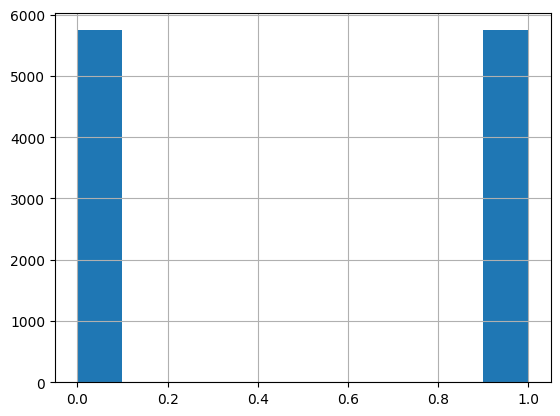

In [27]:
df_balanced['Vulnerability_status'].hist()

In [28]:
df_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,418337,file,WARNING,Logging found,"Log.i(""fbn"", ""Notifications enabled? "" + notif...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(""user_str"", ""user_str"" + notifications);"
1,263359,file,WARNING,Logging found,"Log.v(MainActivity.TAG, ""Download complete! ID...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.v(MainActivity.TAG, ""user_str"" + id);"
2,451055,file,WARNING,Logging found,"Log.i(TAG, ""URL: "" + urlString);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.i(TAG, ""user_str"" + urlString);"
3,193455,NaN,NaN,NaN,"output.append(buffer, 0, read);",NaN,NaN,0,"output.append(buffer, 0, read);"
4,219970,file,INFO,Hardcoded HTTP url found,"link = link.replace(""."", ""/"");",CWE-312,Cleartext Storage of Sensitive Information,1,"link = link.replace(""user_str"", ""user_str"");"


In [29]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [30]:
df_balanced.head(10)

,index,category,Vulnerability_status,processed_code
0,418337,file,1,"Log.i(""user_str"", ""user_str"" + notifications);"
1,263359,file,1,"Log.v(MainActivity.TAG, ""user_str"" + id);"
2,451055,file,1,"Log.i(TAG, ""user_str"" + urlString);"
3,193455,NaN,0,"output.append(buffer, 0, read);"
4,219970,file,1,"link = link.replace(""user_str"", ""user_str"");"
5,503607,NaN,0,pressureSum += sample.pressure;
6,404703,file,1,"Log.e(TAG, String.format(""user_str"", destinati..."
7,303608,file,1,"Log.i(TAG, ""user_str"" + from + ""user_str"" + to);"
8,246227,file,1,"Log.d(LOGTAG, ""user_str"" + notificationApiKey);"
9,361372,broadcast,1,"registerReceiver(mNetworkReceiver, filter);"


In [31]:
df_balanced.tail(10)

,index,category,Vulnerability_status,processed_code
11480,245109,NaN,0,if (share.toLowerCase().contains(query)) {
11481,588308,NaN,0,in.readBooleanArray(booleans);
11482,33784,file,1,"Log.e(TAG, msg, e);"
11483,255644,NaN,0,public class RemoveFeedDialog {
11484,225012,NaN,0,* for now
11485,17587,webview,1,WebView myWebView = (WebView) findViewById(R.i...
11486,150710,NaN,0,""" const result = valid ? height + rand.no..."
11487,547491,NaN,0,.append(' ')
11488,282495,NaN,0,* writeValueXml(). The XmlPullParser must be ...
11489,261316,file,1,"Log.e(TAG, ""user_str"" + characterBuf.toString(..."


In [32]:
df_balanced.dropna()

,index,category,Vulnerability_status,processed_code
0,418337,file,1,"Log.i(""user_str"", ""user_str"" + notifications);"
1,263359,file,1,"Log.v(MainActivity.TAG, ""user_str"" + id);"
2,451055,file,1,"Log.i(TAG, ""user_str"" + urlString);"
4,219970,file,1,"link = link.replace(""user_str"", ""user_str"");"
6,404703,file,1,"Log.e(TAG, String.format(""user_str"", destinati..."
...,...,...,...,...
11475,551486,file,1,"Log.e(TAG, ioException.toString());"
11478,444689,file,1,path = Environment.getExternalStoragePublicDir...
11482,33784,file,1,"Log.e(TAG, msg, e);"
11485,17587,webview,1,WebView myWebView = (WebView) findViewById(R.i...


In [33]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [34]:
df_balanced.head()

,processed_code,Vulnerability_status
0,"Log.i(""user_str"", ""user_str"" + notifications);",1
1,"Log.v(MainActivity.TAG, ""user_str"" + id);",1
2,"Log.i(TAG, ""user_str"" + urlString);",1
3,"output.append(buffer, 0, read);",0
4,"link = link.replace(""user_str"", ""user_str"");",1


In [35]:
df_balanced.columns = ['text', 'labels']

In [36]:
df_balanced.head(5)

,text,labels
0,"Log.i(""user_str"", ""user_str"" + notifications);",1
1,"Log.v(MainActivity.TAG, ""user_str"" + id);",1
2,"Log.i(TAG, ""user_str"" + urlString);",1
3,"output.append(buffer, 0, read);",0
4,"link = link.replace(""user_str"", ""user_str"");",1


In [37]:
df_balanced.head(5)

,text,labels
0,"Log.i(""user_str"", ""user_str"" + notifications);",1
1,"Log.v(MainActivity.TAG, ""user_str"" + id);",1
2,"Log.i(TAG, ""user_str"" + urlString);",1
3,"output.append(buffer, 0, read);",0
4,"link = link.replace(""user_str"", ""user_str"");",1


In [38]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [39]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [40]:
from datasets import load_dataset, DatasetDict

In [41]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [42]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 11490
    })
})

In [43]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [44]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 6894
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 2298
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 2298
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/graphcodebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/6894 [00:00<?, ? examples/s]

Map:   0%|          | 0/2298 [00:00<?, ? examples/s]

Map:   0%|          | 0/2298 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [56]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [57]:
import evaluate

In [58]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [59]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [60]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,0.166163,{'accuracy': 0.9543080939947781},{'recall': 0.9425587467362925},{'precision': 0.9652406417112299},{'f1': 0.9537648612945839}
2,0.202700,0.153318,{'accuracy': 0.9608355091383812},{'recall': 0.9503916449086162},{'precision': 0.9706666666666667},{'f1': 0.9604221635883905}
3,0.121000,0.172251,{'accuracy': 0.9599651871192341},{'recall': 0.9634464751958225},{'precision': 0.9567847882454624},{'f1': 0.9601040763226366}
4,0.069200,0.193784,{'accuracy': 0.95822454308094},{'recall': 0.9573542210617929},{'precision': 0.9590235396687009},{'f1': 0.9581881533101045}


Trainer is attempting to log a value of "{'accuracy': 0.9543080939947781}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9425587467362925}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9652406417112299}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9537648612945839}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9608355091383812}" of type <class 

TrainOutput(global_step=1724, training_loss=0.12022980847104243, metrics={'train_runtime': 642.018, 'train_samples_per_second': 42.952, 'train_steps_per_second': 2.685, 'total_flos': 7255550462607360.0, 'train_loss': 0.12022980847104243, 'epoch': 4.0})

In [61]:
outcome= trainer.predict(tokenized_datasets['test'])

In [62]:
print(outcome.metrics)

{'test_loss': 0.21622158586978912, 'test_accuracy': {'accuracy': 0.9556135770234987}, 'test_recall': {'recall': 0.9572052401746725}, 'test_precision': {'precision': 0.9538729329852045}, 'test_f1': {'f1': 0.955536181342633}, 'test_runtime': 18.2577, 'test_samples_per_second': 125.865, 'test_steps_per_second': 1.972}
